In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv(r"D:\data science\Assignments\assign\Pharma_Industry.csv")
df.head()


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


Dataset loaded successfully!

Columns present:
['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)', 'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)', 'Blood Glucose Level (mg/dL)', 'Drug Response']

Using column 'Drug Dosage (mg)' to create DrugResponse (automatic).

DrugResponse column created successfully!


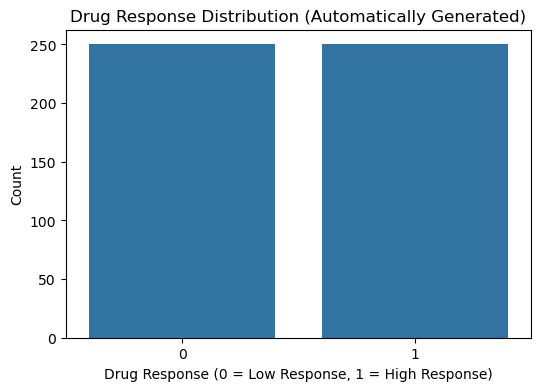

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\data science\Assignments\assign\Pharma_Industry.csv")

print("Dataset loaded successfully!")
print("\nColumns present:")
print(df.columns.tolist())


#  Identify numeric columns 

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if len(numeric_cols) == 0:
    raise ValueError("No numeric columns found. Cannot create a response label automatically.")

# Use FIRST numeric column to create DrugResponse
selected_feature = numeric_cols[0]

print(f"\nUsing column '{selected_feature}' to create DrugResponse (automatic).")


#  Create DrugResponse column automatically
# Rule: values above median → 1 else → 0

median_value = df[selected_feature].median()
df['DrugResponse'] = (df[selected_feature] > median_value).astype(int)

print("\nDrugResponse column created successfully!")


#  Plot the target distribution

plt.figure(figsize=(6,4))
sns.countplot(x=df['DrugResponse'])
plt.title("Drug Response Distribution (Automatically Generated)")
plt.xlabel("Drug Response (0 = Low Response, 1 = High Response)")
plt.ylabel("Count")
plt.show()


In [11]:
# Train–Test Split

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
target_col = num_cols[0]   # use first numeric column
df["DrugResponse"] = (df[target_col] > df[target_col].median()).astype(int)

# Split
X = df.drop(["DrugResponse"], axis=1)
y = df["DrugResponse"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Done.")


Done.


In [12]:
# Data Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Model Training (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.96      1.00      0.98        46

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


Confusion Matrix:


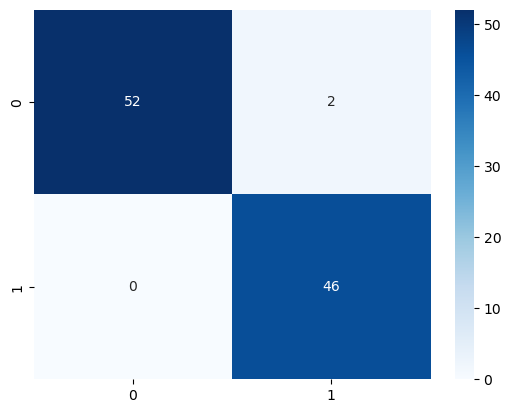

In [14]:
# redictions & Evaluation

y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.show()


In [15]:
# Feature Importance

importances = model.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp.sort_values(by="Importance", ascending=False).head(10)


,Feature,Importance
0,Drug Dosage (mg),0.906415
3,Liver Toxicity Index (U/L),0.029741
4,Blood Glucose Level (mg/dL),0.024149
1,Systolic Blood Pressure (mmHg),0.020803
2,Heart Rate (BPM),0.016805
5,Drug Response,0.002087


In [16]:
                                                       #SCALAR VECTOR MACHINE 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"D:\data science\Assignments\assign\Pharma_Industry.csv")

print("Dataset Loaded Successfully\n")
print(df.head())

print("\nShape of Data:", df.shape)

print("\nSummary Statistics:")
print(df.describe())

print("\nColumn Names:")
print(df.columns.tolist())


Dataset Loaded Successfully

   Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0         -0.128538                        0.303280         -1.881849   
1         -1.846188                        2.865142         -0.929511   
2         -1.252393                       -1.541613          0.363632   
3          1.992515                       -1.142779         -0.766657   
4          0.377100                        0.538410         -0.029263   

   Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug Response  
0                    0.258286                    -0.792011              1  
1                    2.866786                    -0.719447              1  
2                   -0.325370                     0.191314              0  
3                    0.975286                    -0.823355              1  
4                    1.896015                    -0.960130              1  

Shape of Data: (500, 6)

Summary Statistics:
       Drug Dosage (mg)  Systo

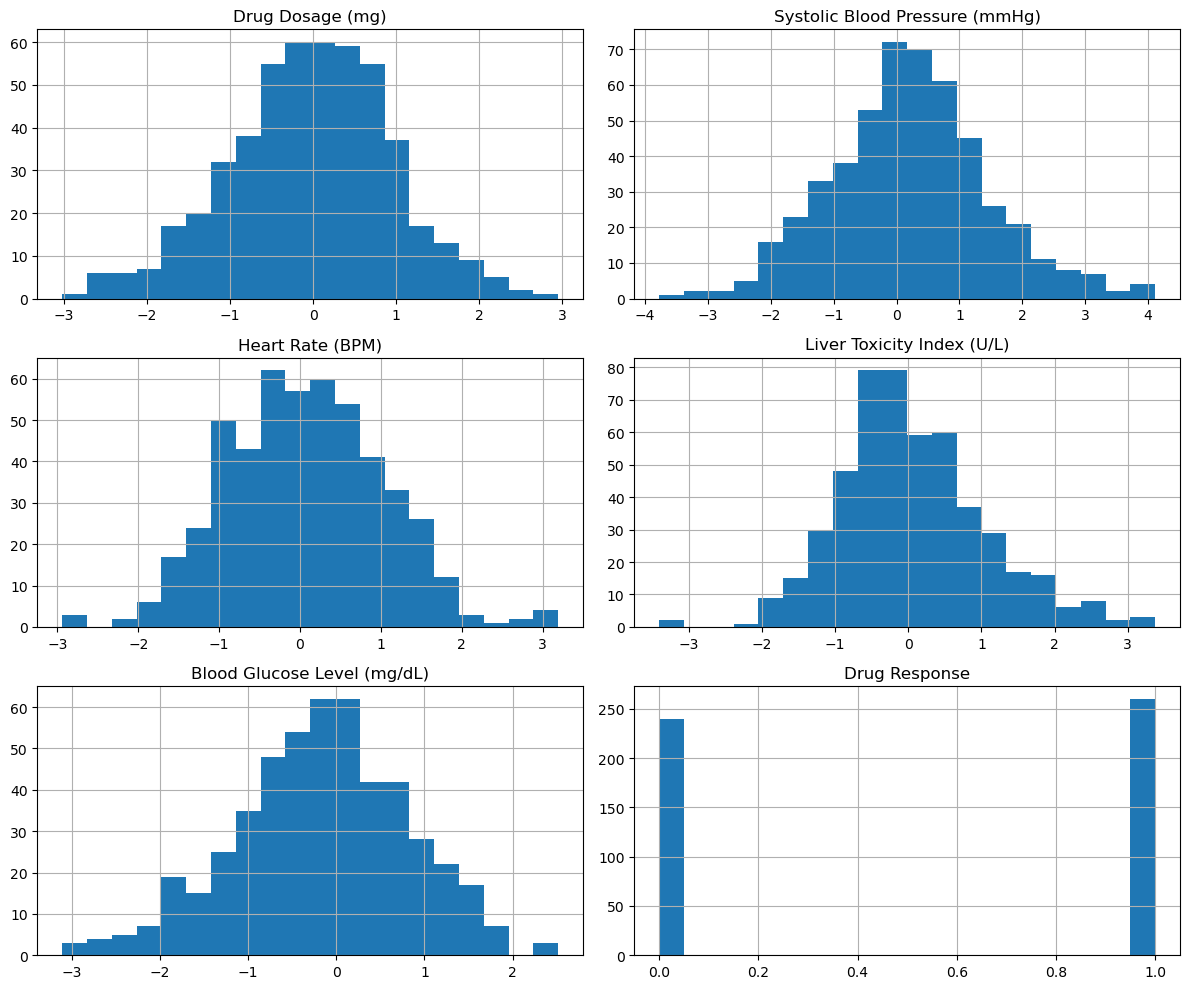

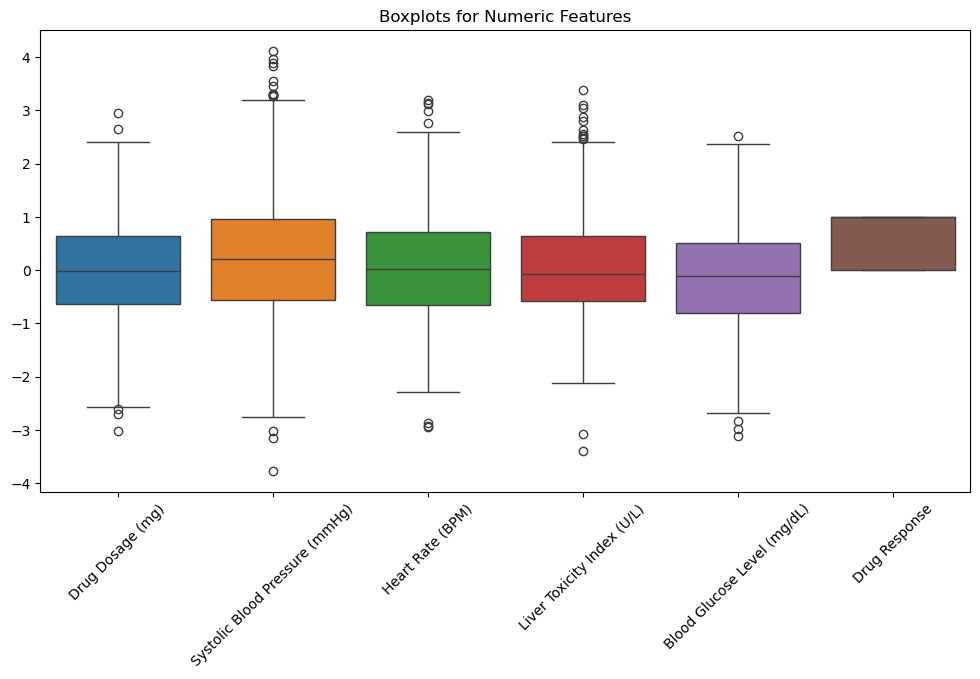

In [17]:
# Plot histogram for all numeric columns
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplots for Numeric Features")
plt.xticks(rotation=45)
plt.show()


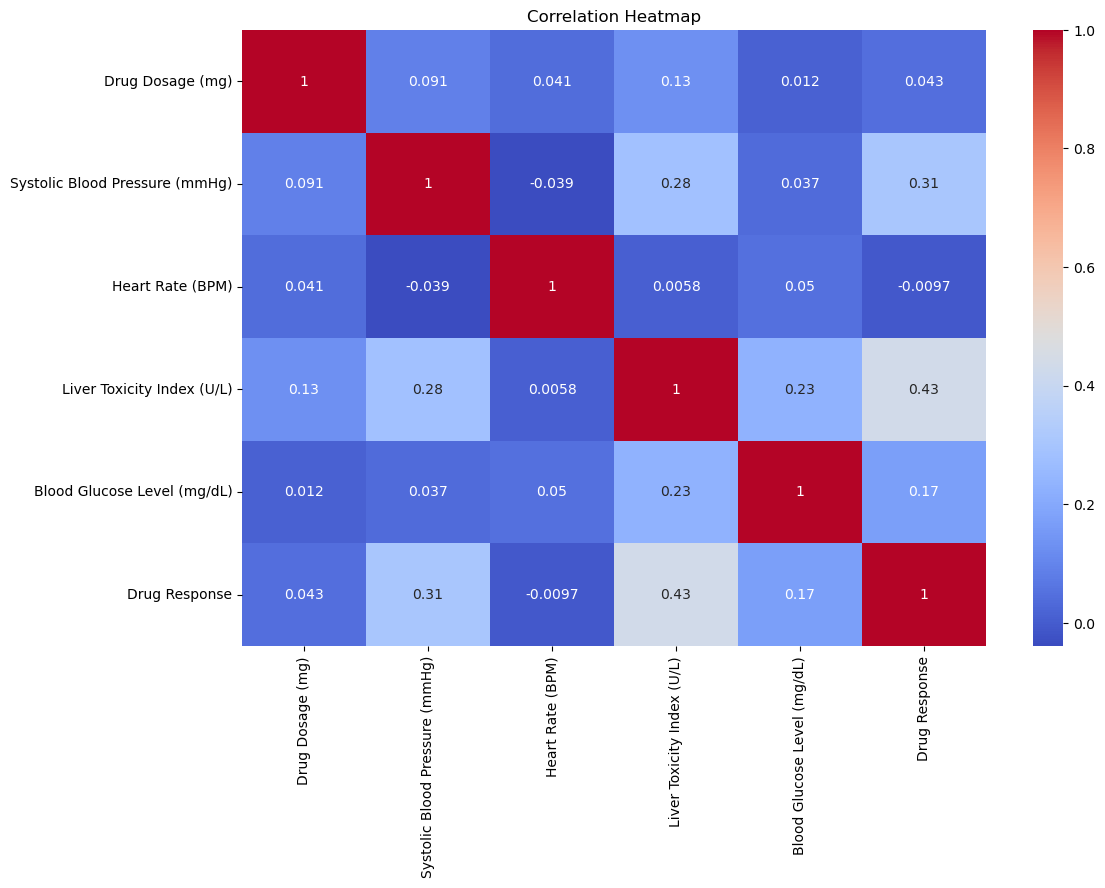

In [18]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [19]:
# Task 2: Data Preprocessing
#Encode categorical variables (if any)
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [20]:
# Create Target column

# Identify numeric columns
num_cols = df_encoded.select_dtypes(include=['float64','int64']).columns

# Use first numeric column to auto-create target
target_base = num_cols[0]

df_encoded["DrugResponse"] = (df_encoded[target_base] > df_encoded[target_base].median()).astype(int)
print("DrugResponse created using median split of:", target_base)


DrugResponse created using median split of: Drug Dosage (mg)


In [21]:
# Train-test Split

from sklearn.model_selection import train_test_split

X = df_encoded.drop("DrugResponse", axis=1)
y = df_encoded["DrugResponse"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training and Testing Split Done")
print("X_train:", X_train.shape, "X_test:", X_test.shape)


Training and Testing Split Done
X_train: (400, 6) X_test: (100, 6)


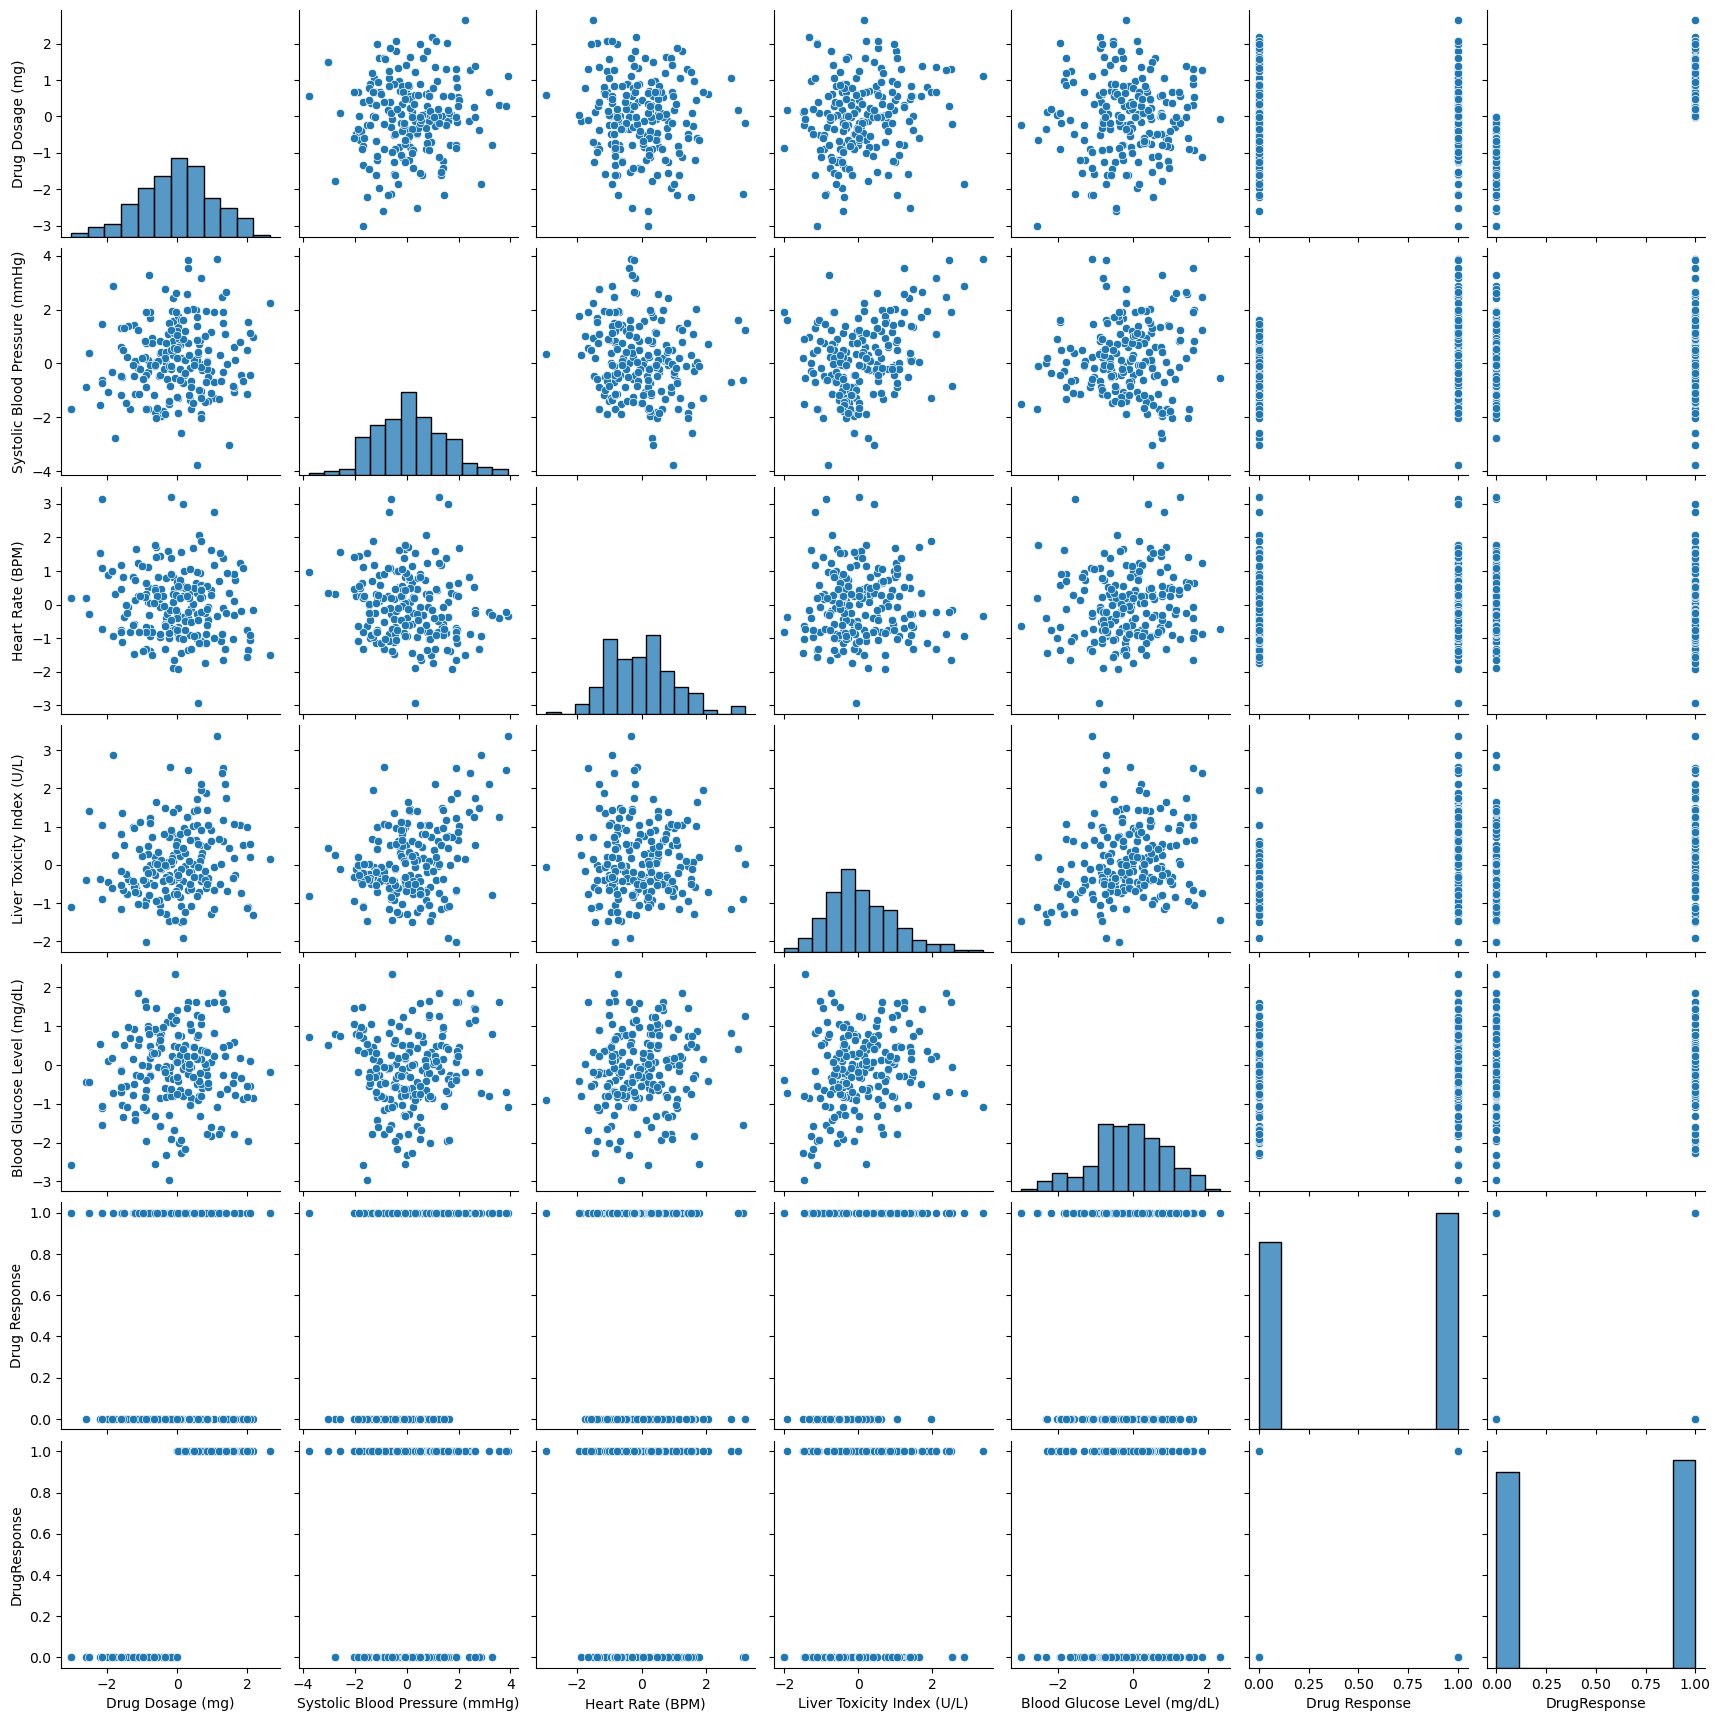

In [22]:
# Data Visualization
# Scatter plots / Pair plots
sns.pairplot(df_encoded.sample(200))  # sample to avoid heavy load
plt.show()


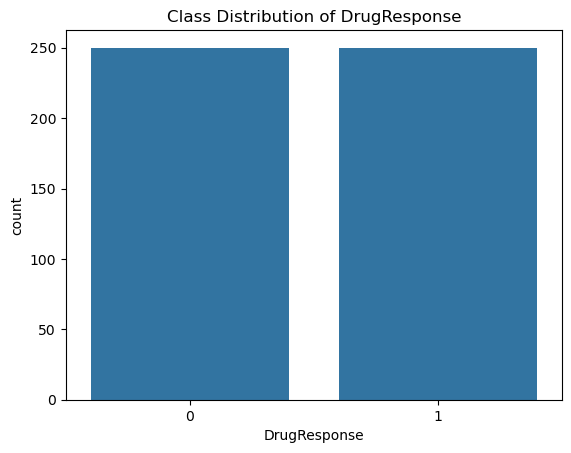

In [23]:
#Visualize Class Distribution
sns.countplot(x=df_encoded["DrugResponse"])
plt.title("Class Distribution of DrugResponse")
plt.show()


In [24]:
# SVM Implementation
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.98      0.98      0.98        46

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


Confusion Matrix:


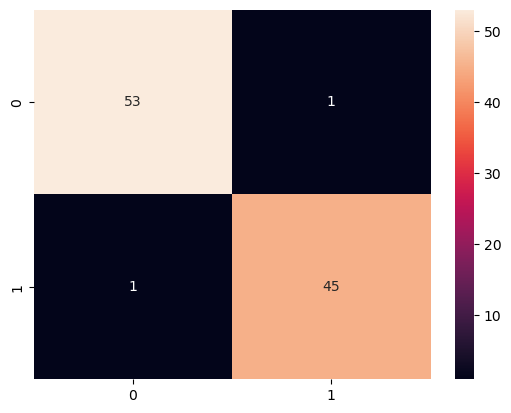

In [25]:
# Evaluate Model Performance
y_pred = svm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


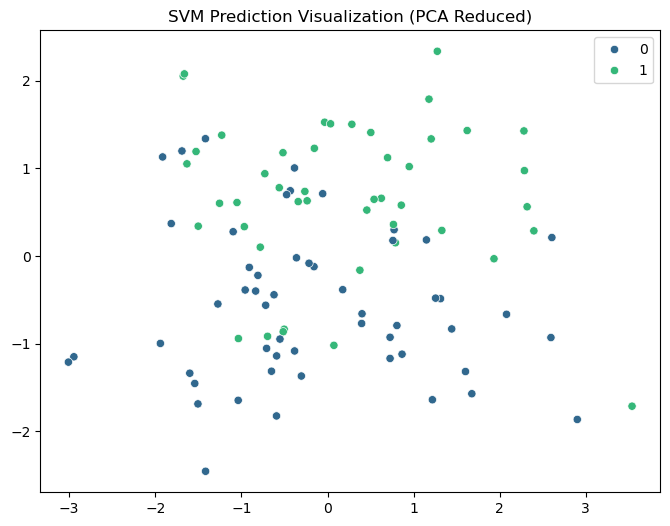

In [26]:
# Visualization of SVM Results
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test_2D[:,0], y=X_test_2D[:,1], hue=y_pred, palette="viridis")
plt.title("SVM Prediction Visualization (PCA Reduced)")
plt.show()


In [27]:
# Parameter Tuning

kernels = ['linear', 'poly', 'rbf']
results = {}

for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[k] = score

print("Kernel Performance Comparison:")
for k,v in results.items():
    print(f"{k}: {v}")


Kernel Performance Comparison:
linear: 0.98
poly: 0.95
rbf: 0.97


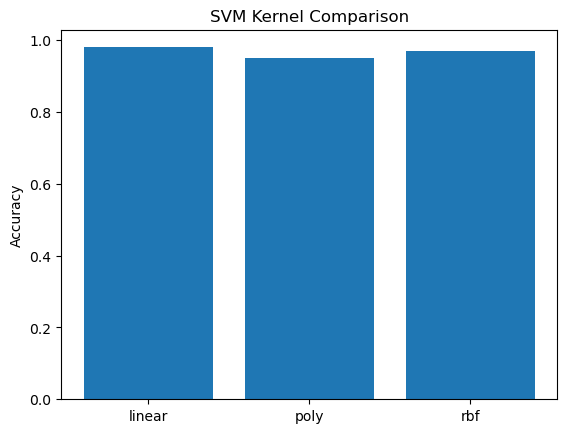

In [28]:
# Comparison & Analysis
plt.bar(results.keys(), results.values())
plt.title("SVM Kernel Comparison")
plt.ylabel("Accuracy")
plt.show()
